### Post Processing and Visualization
---

In [24]:
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
from torchtext.data.metrics import bleu_score

plt.style.use('ggplot')
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
PAD_TOKEN = '<pad>'
UNK_TOKEN = '<unk>'
SOS_TOKEN = '<sos>'
EOS_TOKEN = '<eos>'

### Load test performances
---

In [170]:
def reverse_vocab(vocab):
    return dict([(v, k) for k,v in vocab.items()])

def validate_vocab(d):
    print(f"one to one mapping: {bool(len(d) == len(set([v for _, v in d.items()])))}")
    print(len(d), len(set([v for _, v in d.items()])))
    
def set_util_maps(itos):
    itos[0] = '<unk>'
    itos[1] = '<pad>'
    itos[2] = '<sos>'
    itos[3] = '<eos>'
    return itos

def batched_data_to_list(src, tgt, pred_tgts):
    """ src, tgt, pred_tgts have format:
    [tensor(src_len, batch size), ...]
    
    return [[int0, int1, int2,...],...]
    """
    src_, tgt_, pred_tgts_ = [], [], []
    
    for batch in src:
        src_.extend([datum.tolist() for datum in batch.transpose(1,0)])
    
    for batch in tgt:
        tgt_.extend([datum.tolist() for datum in batch.transpose(1,0)])
        
    for batch in pred_tgts:
        pred_tgts_.extend([datum.tolist() for datum in batch.argmax(2).transpose(1,0)])
        
    return src_, tgt_, pred_tgts_


def ints_to_sentences(sent, vocab):
    """sent is a sequence of ints"""
    return [vocab[w] if w in vocab else "<unk>" for w in sent]

def clip_sentence(sent):
    """ sent: list[str] """
    # remove initial <sos>
    sent = sent[1:]
    
    # stop when first "<eos>" generated
    sent_ = []
    for w in sent:
        if w == '<eos>':
            return sent_
        sent_.append(w)
    return sent_

def postprocess(src, tgt, pred_tgts, src_itos, tgt_itos):
    src, tgt, pred_tgts = batched_data_to_list(src, tgt, pred_tgts)
    src = list(map(lambda sent: ints_to_sentences(sent, src_itos), src))
    tgt = list(map(lambda sent: ints_to_sentences(sent, tgt_itos), tgt))
    pred_tgts = list(map(lambda sent: ints_to_sentences(sent, tgt_itos), pred_tgts))
    
    src = list(map(clip_sentence, src))
    tgt = list(map(clip_sentence, tgt))
    pred_tgts = list(map(clip_sentence, pred_tgts))
    return src, tgt, pred_tgts

def bleu_score_wrapper(tgt, pred_tgts):
    """ convert format of tgt to appropriate format """
    tgt = [[t] for t in tgt]
    return bleu_score(pred_tgts, tgt)

def write_translations(sents, file):
    with open(file, 'w') as f:
        for sent in sents:
            f.write(" ".join(sent)+"\n")

In [212]:
# Multi30k-gru**2-5
payload = torch.load("for-analysis/Multi30k-gru**2-5/payload.pt")
print(payload.keys())
pred_tgts = payload['pred_tgts']
src = payload['src']
tgt = payload['tgt']
src_vocab = payload['SRC_vocab']  # stoi
tgt_vocab = payload['TGT_vocab']  # stoi
src_itos = set_util_maps(reverse_vocab(src_vocab))
tgt_itos = set_util_maps(reverse_vocab(tgt_vocab))

# compute bleu score
src, tgt, pred_tgts = postprocess(src, tgt, pred_tgts, src_itos, tgt_itos)
gru_tgt = tgt
gru_src = src
write_translations(pred_tgts, "for-analysis/output_translations/gru**2.eng")
print(f"Bleu score: {bleu_score_wrapper(pred_tgts, tgt)*100}")

dict_keys(['pred_tgts', 'src', 'tgt', 'SRC_vocab', 'TGT_vocab'])
Bleu score: 2.373911067843437


In [172]:
# Multi30k-gcn_gru-1
payload = torch.load("for-analysis/Multi30k-gcn_gru-1/payload.pt")
print(payload.keys())
pred_tgts = payload['pred_tgts']
src = payload['src']
tgt = payload['tgt']
src_vocab = payload['SRC_vocab']  # stoi
tgt_vocab = payload['TGT_vocab']  # stoi
src_itos = set_util_maps(reverse_vocab(src_vocab))
tgt_itos = set_util_maps(reverse_vocab(tgt_vocab))

# compute bleu score
src, tgt, pred_tgts = postprocess(src, tgt, pred_tgts, src_itos, tgt_itos)
write_translations(pred_tgts, "for-analysis/output_translations/gcn_gru.eng")
print(f"Bleu score: {bleu_score_wrapper(pred_tgts, tgt)*100}")

dict_keys(['pred_tgts', 'src', 'tgt', 'SRC_vocab', 'TGT_vocab'])
Bleu score: 7.8253477811813354


In [173]:
# Multi30k-gcngru_gru-1
payload = torch.load("for-analysis/Multi30k-gcngru_gru-1/payload.pt")
print(payload.keys())
pred_tgts = payload['pred_tgts']
src = payload['src']
tgt = payload['tgt']
src_vocab = payload['SRC_vocab']  # stoi
tgt_vocab = payload['TGT_vocab']  # stoi
src_itos = set_util_maps(reverse_vocab(src_vocab))
tgt_itos = set_util_maps(reverse_vocab(tgt_vocab))

# compute bleu score
src, tgt, pred_tgts = postprocess(src, tgt, pred_tgts, src_itos, tgt_itos)
write_translations(pred_tgts, "for-analysis/output_translations/gcngru_gru.eng")
print(f"Bleu score: {bleu_score_wrapper(pred_tgts, tgt)*100}")

dict_keys(['pred_tgts', 'src', 'tgt', 'SRC_vocab', 'TGT_vocab'])
Bleu score: 22.964130342006683


In [174]:
# Multi30k-gcnattn_gru-1
payload = torch.load("for-analysis/Multi30k-gcnattn_gru-1/payload.pt")
print(payload.keys())
pred_tgts = payload['pred_tgts']
src = payload['src']
tgt = payload['tgt']
src_vocab = payload['SRC_vocab']  # stoi
tgt_vocab = payload['TGT_vocab']  # stoi
src_itos = set_util_maps(reverse_vocab(src_vocab))
tgt_itos = set_util_maps(reverse_vocab(tgt_vocab))

# compute bleu score
src, tgt, pred_tgts = postprocess(src, tgt, pred_tgts, src_itos, tgt_itos)
write_translations(pred_tgts, "for-analysis/output_translations/gcnattn_gru.eng")
print(f"Bleu score: {bleu_score_wrapper(pred_tgts, tgt)*100}")

dict_keys(['pred_tgts', 'attns', 'src', 'tgt', 'SRC_vocab', 'TGT_vocab'])
Bleu score: 16.638437879309034


In [175]:
# gru_attn**2
payload = torch.load("for-analysis/Multi30k-gru_attn**2-3/payload.pt")
print(payload.keys())
pred_tgts = payload['pred_tgts']
attns = payload['attns']
src = payload['src']
tgt = payload['tgt']
src_vocab = payload['SRC_vocab']  # stoi
tgt_vocab = payload['TGT_vocab']  # stoi
src_itos = set_util_maps(reverse_vocab(src_vocab))
tgt_itos = set_util_maps(reverse_vocab(tgt_vocab))

# compute bleu score
src, tgt, pred_tgts = postprocess(src, tgt, pred_tgts, src_itos, tgt_itos)
write_translations(pred_tgts, "for-analysis/output_translations/gru_attn.eng")
print(f"Bleu score: {bleu_score_wrapper(pred_tgts, tgt)*100}")

dict_keys(['pred_tgts', 'attns', 'src', 'tgt', 'SRC_vocab', 'TGT_vocab'])
Bleu score: 29.867154359817505


In [176]:
# Multi30k-gcngruattn_gru-1
payload = torch.load("for-analysis/Multi30k-gcngruattn_gru-1/payload.pt")
print(payload.keys())
pred_tgts = payload['pred_tgts']
attns = payload['attns']
src = payload['src']
tgt = payload['tgt']
src_vocab = payload['SRC_vocab']  # stoi
tgt_vocab = payload['TGT_vocab']  # stoi
src_itos = set_util_maps(reverse_vocab(src_vocab))
tgt_itos = set_util_maps(reverse_vocab(tgt_vocab))

# compute bleu score
src, tgt, pred_tgts = postprocess(src, tgt, pred_tgts, src_itos, tgt_itos)
write_translations(pred_tgts, "for-analysis/output_translations/gcngruattn_gru.eng")
print(f"Bleu score: {bleu_score_wrapper(pred_tgts, tgt)*100}")

dict_keys(['pred_tgts', 'attns', 'src', 'tgt', 'SRC_vocab', 'TGT_vocab'])
Bleu score: 29.064443707466125


In [177]:
write_translations(tgt, "for-analysis/output_translations/ref.eng")

#### Separately deal with transformer

In [222]:
# transformer
payload = torch.load("for-analysis/Multi30k-transformer-100/payload.pt", map_location=torch.device('cpu'))
print(payload.keys())
pred_tgts = payload['pred_tgts']
attns = payload['attns']
src = payload['src']
tgt = payload['tgt']
tfmr_src = src
tfmr_tgt = tgt
src_vocab = payload['SRC_vocab']
tgt_vocab = payload['TGT_vocab']

dict_keys(['pred_tgts', 'attns', 'src', 'tgt', 'SRC_vocab', 'TGT_vocab'])


In [223]:
write_translations(tgt, "for-analysis/output_translations/tfmr_ref.eng")
write_translations(pred_tgts, "for-analysis/output_translations/transformer.eng")
print(f"Bleu score: {bleu_score_wrapper(pred_tgts, tgt)*100}")

Bleu score: 36.47030293941498


In [218]:
gru_srcs = [" ".join(sent) for sent in gru_src]
gru_tgts = [" ".join(sent) for sent in gru_tgt]
print(gru_tgts[:10])

['three men are walking up hill .', 'two men wearing hats .', 'an army officer is inspecting something .', 'a woman is playing volleyball .', 'a rock concert is taking place .', 'young woman climbing rock face', 'people are admiring a work of art .', 'a child is splashing in the water', 'people sit inside a train .', 'a car parked at the beach .']


In [219]:
tfmr_srcs = [" ".join(sent) for sent in tfmr_src]
tfmr_tgts = [" ".join(sent) for sent in tfmr_tgt]
print(tfmr_tgts[:10])

['a man in an orange hat starring at something .', 'a boston terrier is running on lush green grass in front of a white fence .', 'a girl in karate uniform breaking a stick with a front kick .', 'five people wearing winter jackets and helmets stand in the snow , with snowmobiles in the background .', 'people are fixing the roof of a house .', 'a man in light colored clothing photographs a group of men wearing dark suits and hats standing around a woman dressed in a strapless gown .', 'a group of people standing in front of an igloo .', 'a boy in a red uniform is attempting to avoid getting out at home plate , while the catcher in the blue uniform is attempting to catch him .', 'a guy works on a building .', 'a man in a vest is sitting in a chair and holding magazines .']


In [220]:
for i in range(10):
    print("-"*80)
    print(gru_srcs[i])
    print(gru_tgts[i])
    print(tfmr_srcs[i])
    print(tfmr_tgts[i])

--------------------------------------------------------------------------------
drei männer gehen bergauf .
three men are walking up hill .
ein mann mit einem orangefarbenen hut , der etwas anstarrt .
a man in an orange hat starring at something .
--------------------------------------------------------------------------------
zwei männer mit mützen .
two men wearing hats .
ein boston terrier läuft über saftig-grünes gras vor einem weißen zaun .
a boston terrier is running on lush green grass in front of a white fence .
--------------------------------------------------------------------------------
ein <unk> inspiziert etwas .
an army officer is inspecting something .
ein mädchen in einem karateanzug bricht ein brett mit einem tritt .
a girl in karate uniform breaking a stick with a front kick .
--------------------------------------------------------------------------------
eine frau spielt volleyball .
a woman is playing volleyball .
fünf leute in winterjacken und mit helmen stehen

#### Analysis
---

In [54]:
bleu_by_len = pd.read_csv("for-analysis/analysis-data/bleu_by_sent_length.csv", index_col=0)
bleu = pd.read_csv("for-analysis/analysis-data/bleu_score.csv", index_col=0)
len_diff = pd.read_csv("for-analysis/analysis-data/bucket_type_len_diff-bucket_type_count.csv", index_col=0)
len_count = pd.read_csv("for-analysis/analysis-data/bucket_type_sent_level_BLEU_count.csv", index_col=0)
word_fleas = pd.read_csv("for-analysis/analysis-data/word_fleas_by_frequency_bucket.csv", index_col=0)

In [55]:
bleu

,gru2gru,gcn2gru,gcngru2gru,gru2gru-attn,gcn2gru-attn,gcngru2gru-attn,transformer
BLEU,2.4009,7.8999,23.1794,30.1388,16.5698,29.3435,36.4986
length ratio,"0.8424 (ref=13058, out=11000)","0.8020 (ref=13058, out=10473)","0.9121 (ref=13058, out=11910)","0.9161 (ref=13058, out=11962)","1.0350 (ref=13058, out=13515)","0.9073 (ref=13058, out=11848)","0.9944 (ref=13058, out=12985)"


No handles with labels found to put in legend.


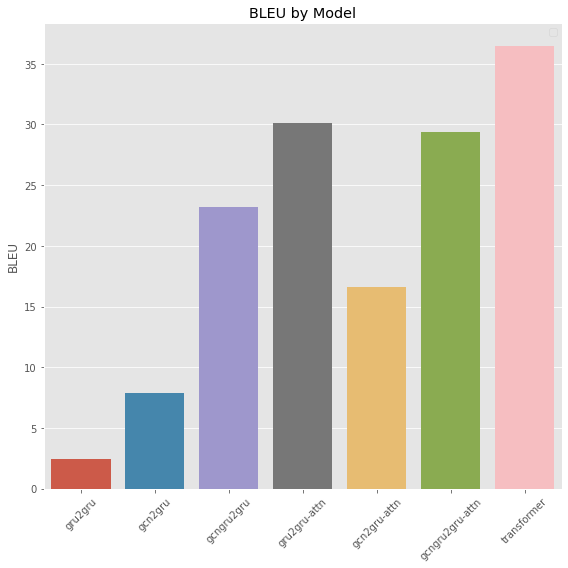

In [62]:
fig = plt.figure(figsize=(8,8))
sns.barplot(x=bleu.columns, y=bleu.loc['BLEU'])
plt.xticks(rotation=45)
plt.legend()
plt.title("BLEU by Model")
plt.savefig("plots/bleu-by-model.png")
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


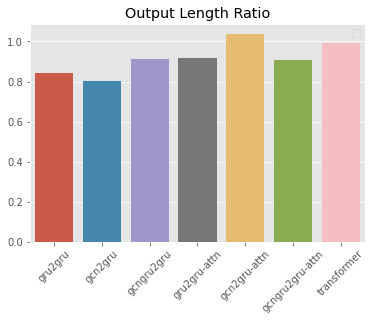

In [33]:
len_ratio = list(map(lambda x: float(x.split()[0]), bleu.loc['length ratio']))
sns.barplot(x=bleu.columns, y=len_ratio)
plt.xticks(rotation=45)
plt.legend()
plt.title("Output Length Ratio")
plt.show()

In [10]:
bleu_by_len

,gru2gru,gcn2gru,gcngru2gru,gru2gru-attn,gcn2gru-attn,gcngru2gru-attn,transformer
length,,,,,,,
<10,24.5712,7.3517,25.5988,32.0295,12.1291,25.4822,36.4862
"[10,20)",2.4924,8.3208,24.0196,31.1055,17.2280,30.7746,37.8114
"[20,30)",1.9736,3.0439,14.2327,19.7787,10.6913,21.8742,24.8010
"[30,40)",2.4127,3.2907,24.6559,23.6155,15.1772,34.2396,33.6290


<Figure size 576x576 with 0 Axes>

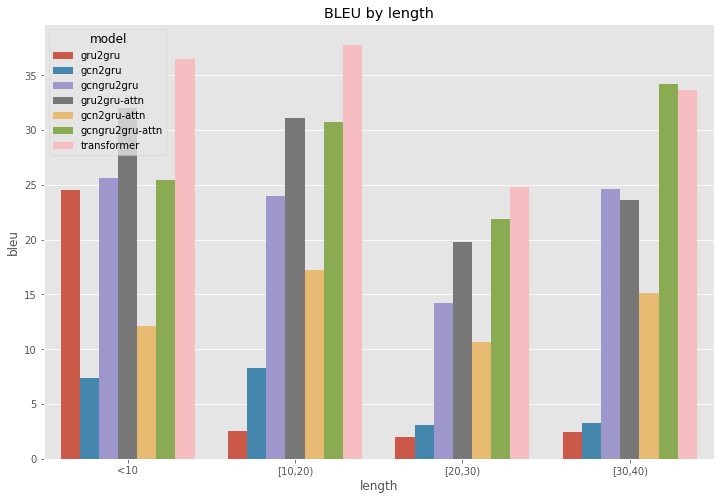

In [65]:
fig = plt.figure(figsize=(8,8))
df = bleu_by_len.stack().to_frame()
df = df.reset_index()
df.columns = ["length", "model", "bleu"]

plt.figure(figsize=(12,8))
sns.barplot(data=df, x="length", y="bleu", hue="model")
plt.title("BLEU by length")
plt.savefig("plots/bleu-by-length.png", quality=95)
plt.show()

In [11]:
len_diff

,gru2gru,gcn2gru,gcngru2gru,gru2gru-attn,gcn2gru-attn,gcngru2gru-attn,transformer
lengthdiff,,,,,,,
<-20,2,1,0,0,0,0,0
"[-20,-10)",44,49,0,2,13,1,2
"[-10,-5)",115,141,44,43,51,47,20
-5,58,58,25,34,26,37,20
-4,79,96,55,49,25,70,26
-3,89,105,124,95,47,95,57
-2,93,111,132,130,67,131,96
-1,120,119,208,204,107,205,171
0,117,114,186,225,109,206,245


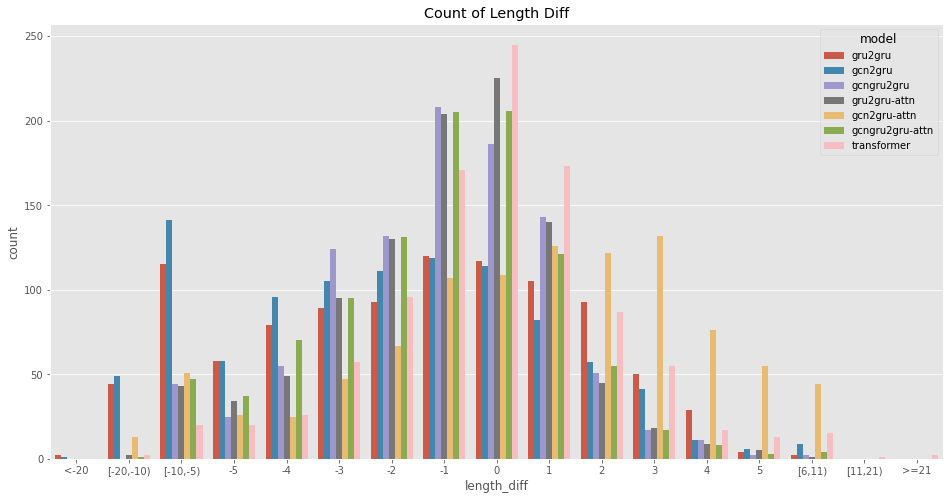

In [64]:
df = len_diff.stack().to_frame()
df = df.reset_index()
df.columns = ["length_diff", "model", "count"]

plt.figure(figsize=(16,8))
sns.barplot(data=df, x="length_diff", y="count", hue="model")
plt.title("Count of Length Diff")
plt.savefig("plots/length-diff-counts.png")
plt.show()

In [12]:
len_count

,gru2gru,gcn2gru,gcngru2gru,gru2gru-attn,gcn2gru-attn,gcngru2gru-attn,transformer
sentbleu,,,,,,,
<10.0,250,145,30,13,50,16,11
"[10.0,20.0)",718,588,304,213,497,213,162
"[20.0,30.0)",24,194,263,269,240,281,220
"[30.0,40.0)",8,52,178,164,112,167,193
"[40.0,50.0)",0,18,96,127,66,129,129
"[50.0,60.0)",0,2,67,92,22,87,90
"[60.0,70.0)",0,0,28,56,10,53,84
"[70.0,80.0)",0,1,21,37,3,36,56
"[80.0,90.0)",0,0,3,13,0,10,19


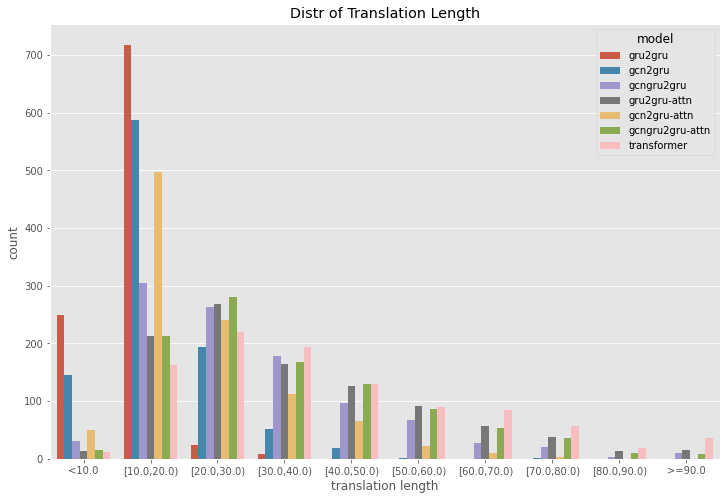

In [53]:
df = len_count.stack().to_frame()
df = df.reset_index()
df.columns = ["translation length", "model", "count"]

plt.figure(figsize=(12,8))
sns.barplot(data=df, x="translation length", y="count", hue="model")
plt.title("Distr of Translation Length")
plt.show()

In [13]:
word_fleas

,gru2gru,gcn2gru,gcngru2gru,gru2gru-attn,gcn2gru-attn,gcngru2gru-attn,transformer
frequency,,,,,,,
<1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.0000,0.0023,0.1716,0.2022,0.0368,0.2329,0.3174
2,0.0000,0.0349,0.2359,0.3098,0.1019,0.3743,0.4703
3,0.0000,0.0394,0.3248,0.4006,0.1497,0.4267,0.5256
4,0.0000,0.0728,0.3196,0.5062,0.1289,0.4554,0.5790
"[5,10)",0.0000,0.0706,0.3913,0.5201,0.2452,0.5041,0.5923
"[10,100)",0.0000,0.3042,0.6048,0.6746,0.4888,0.6677,0.7149
"[100,1000)",0.4221,0.5564,0.6957,0.7248,0.6308,0.7245,0.7551
>=1000,0.3423,0.5035,0.8188,0.8551,0.6100,0.8468,0.8920


by involving gcn into the decoder, the gru was able to capture much more rare words, for words less than or equal to 3.